In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Load Data

In [2]:
df = pd.read_excel("Desktop/Tunde/Data Science Course 2020/Cars.xlsx")

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,309
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Improvement 1 - Include Model feature in regression 

In [5]:
#Rather than dropping the Model feature, use top 9 model to form 9-column dummy variable
#The top 9 model will have a value of 1 but the other model will be 0 
#We are treating the other models are noise as such we are ignoring 

In [6]:
pd.set_option('display.max_row', None)

df.Model.value_counts()

E-Class                   199
A6                        172
Vito                      171
Kangoo                    146
Camry                     134
Caddy                     119
X5                        119
T5 (Transporter)          101
Megane                     88
Trafic                     77
520                        77
Land Cruiser Prado         76
Touareg                    69
Passat B6                  66
320                        60
Polo                       60
Q7                         59
Passat B5                  58
A4                         58
Corolla                    54
Rav 4                      54
525                        54
Lancer                     54
C-Class                    54
T4 (Transporter)           53
Lancer X                   52
530                        52
Passat B7                  51
S 500                      51
Jetta                      49
Pajero Wagon               48
Land Cruiser 200           48
X6                         41
S 350     

In [7]:
model_top_10 = [x for x in df.Model.value_counts().sort_values(ascending=False).head(9).index]

In [8]:
model_top_10

['E-Class',
 'A6',
 'Vito',
 'Kangoo',
 'Camry',
 'Caddy',
 'X5',
 'T5 (Transporter)',
 'Megane']

In [9]:
def one_hot_top10(df,column,top_10):
    
    for label in model_top_10:
        df[column+'_'+label] = np.where(df[column]==label,1,0)

In [10]:
one_hot_top10(df,'Model',model_top_10)

In [11]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0,0,0,0,0,0,0,0,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,0,0,0,0,0,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,0,0,0,0,0,0,0,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,0,0,0,0,0,0,0,0,0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,0,0,0,0,0,0,0,0


In [12]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0,0,0,0,0,0,0,0,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,0,0,0,0,0,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,0,0,0,0,0,0,0,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,0,0,0,0,0,0,0,0,0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,0,0,0,0,0,0,0,0


In [13]:
df.drop('Model',axis=1,inplace=True)

In [14]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,0.045800,0.039586,0.039356,0.033602,0.030840,0.027388,0.027388,0.023245,0.020253
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,0.209075,0.195006,0.194462,0.180223,0.172904,0.163229,0.163229,0.150698,0.140881
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### dealing with missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   4345 non-null   object 
 1   Price                   4173 non-null   float64
 2   Body                    4345 non-null   object 
 3   Mileage                 4345 non-null   int64  
 4   EngineV                 4195 non-null   float64
 5   Engine Type             4345 non-null   object 
 6   Registration            4345 non-null   object 
 7   Year                    4345 non-null   int64  
 8   Model_E-Class           4345 non-null   int64  
 9   Model_A6                4345 non-null   int64  
 10  Model_Vito              4345 non-null   int64  
 11  Model_Kangoo            4345 non-null   int64  
 12  Model_Camry             4345 non-null   int64  
 13  Model_Caddy             4345 non-null   int64  
 14  Model_X5                4345 non-null   

In [16]:
df.isnull().sum()

Brand                       0
Price                     172
Body                        0
Mileage                     0
EngineV                   150
Engine Type                 0
Registration                0
Year                        0
Model_E-Class               0
Model_A6                    0
Model_Vito                  0
Model_Kangoo                0
Model_Camry                 0
Model_Caddy                 0
Model_X5                    0
Model_T5 (Transporter)      0
Model_Megane                0
dtype: int64

In [17]:
#Rule of thumb - if you are removing <5% of the observation, you are free to just remove all that have MV

In [18]:
data_no_MV = df.dropna()

In [19]:
data_no_MV.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,0.046708,0.038758,0.038758,0.033789,0.031553,0.027578,0.027578,0.022609,0.021118
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,0.211039,0.193041,0.193041,0.180708,0.174828,0.163780,0.163780,0.148671,0.143796
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Exploring the PDFs (Probability Distribution Function)

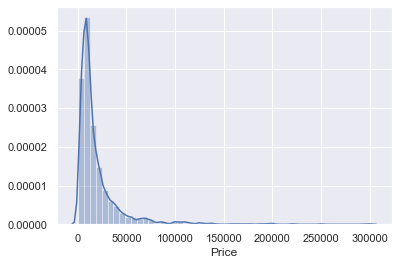

In [20]:
sns.distplot(data_no_MV['Price'])

### Dealing with outliers

In [21]:
data_no_MV['Price'].quantile([1,0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90])

1.00    300000.00
0.99    129812.52
0.98    103999.00
0.97     81639.72
0.96     70000.00
0.95     64820.00
0.94     56500.00
0.93     51500.00
0.92     47316.00
0.91     43983.16
0.90     40996.00
Name: Price, dtype: float64

In [22]:
q = data_no_MV['Price'].quantile(0.99)

data_1= data_no_MV[data_no_MV['Price']<q]

In [23]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,0.047189,0.039157,0.039157,0.034137,0.031878,0.027861,0.027861,0.022841,0.021335
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,0.212069,0.193992,0.193992,0.181603,0.175696,0.164596,0.164596,0.149416,0.144518
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


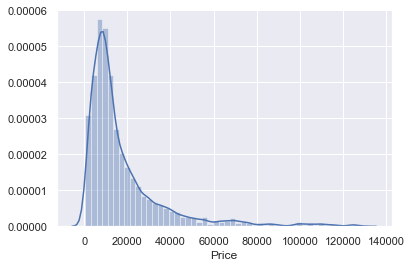

In [24]:
sns.distplot(data_1['Price'])

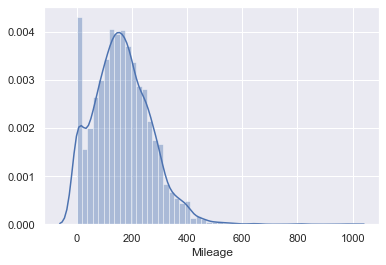

In [25]:
sns.distplot(data_1['Mileage'])

In [26]:
q = data_1['Mileage'].quantile(0.99)

data_2= data_1[data_1['Mileage']<q]

In [27]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.00000,3944.000000,3944.000000,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,0.046907,0.038793,0.039047,0.034483,0.032201,0.02789,0.028144,0.023073,0.021552
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,0.211466,0.193126,0.193731,0.182489,0.176555,0.16468,0.165405,0.150155,0.145233
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


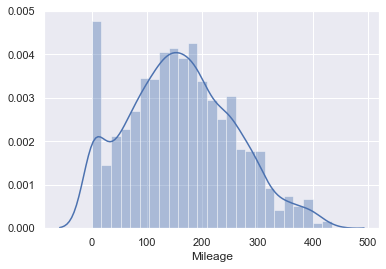

In [28]:
sns.distplot(data_2['Mileage'])

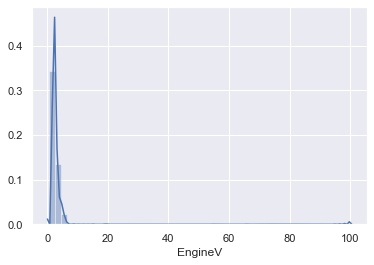

In [29]:
sns.distplot(data_2['EngineV'])

In [30]:
data_3= data_2[data_2['EngineV']<6.5]

In [31]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019,0.047182,0.039021,0.039276,0.033665,0.032390,0.028054,0.028054,0.022953,0.021678
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871,0.212055,0.193669,0.194275,0.180388,0.177055,0.165148,0.165148,0.149774,0.145649
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


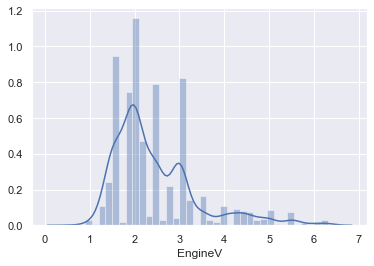

In [32]:
sns.distplot(data_3['EngineV'])

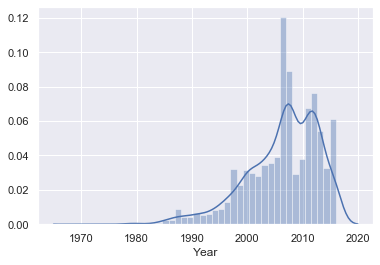

In [33]:
sns.distplot(data_3['Year'])

In [34]:
q = data_3['Year'].quantile(0.01)

data_4= data_3[data_3['Year']>q]

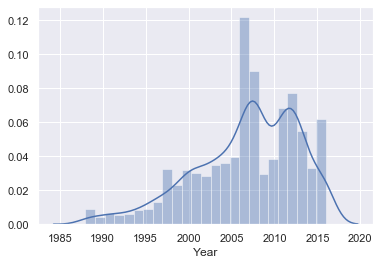

In [35]:
sns.distplot(data_4['Year'])

In [36]:
data_cleaned = data_4.reset_index(drop=True)

In [37]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,0.046806,0.039566,0.039824,0.034135,0.032842,0.028446,0.028446,0.023274,0.021981
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.211251,0.194961,0.195571,0.181599,0.178246,0.166264,0.166264,0.150791,0.146640
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Checking the OLS assumptions

Text(0.5, 0, 'Year')

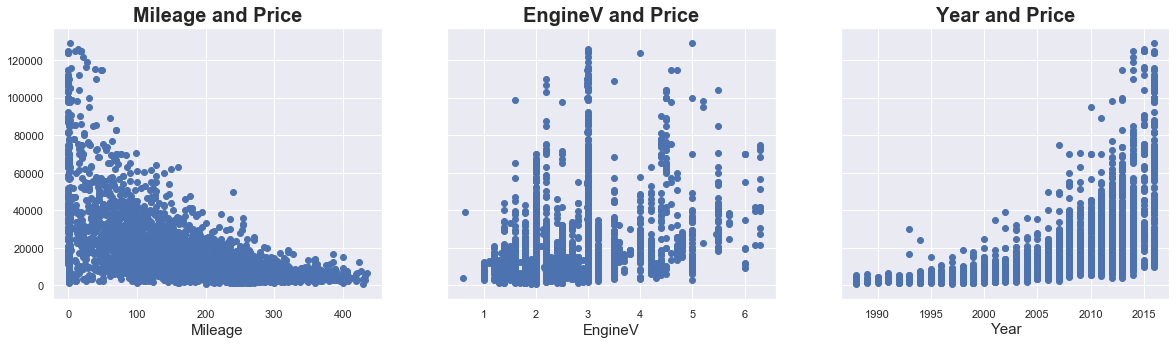

In [38]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5),sharey=True)

ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Mileage and Price',weight='bold',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=15)

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and Price',weight='bold',fontsize=20)
ax2.set_xlabel('EngineV',fontsize=15)

ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Year and Price',weight='bold',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)

### Relaxing the assumptions

In [39]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [40]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,0,0,0,0,0,0,0,0,0,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,0,0,0,0,0,0,0,0,0,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,0,0,0,0,0,0,0,0,0,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,0,0,0,0,0,0,0,0,0,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,0,0,0,0,0,0,0,0,0,9.814656


Text(0.5, 0, 'Year')

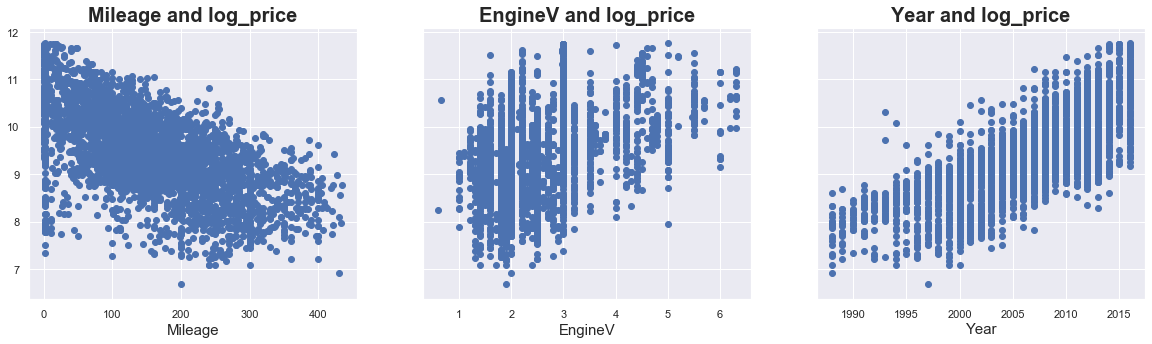

In [41]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5),sharey=True)

ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax1.set_title('Mileage and log_price',weight='bold',fontsize=20)
ax1.set_xlabel('Mileage',fontsize=15)

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('EngineV and log_price',weight='bold',fontsize=20)
ax2.set_xlabel('EngineV',fontsize=15)

ax3.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax3.set_title('Year and log_price',weight='bold',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)

In [42]:
data_cleaned = data_cleaned.drop('Price',axis=1)

In [43]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_Caddy,Model_X5,Model_T5 (Transporter),Model_Megane,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,0,0,0,0,0,0,0,0,0,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,0,0,0,0,0,0,0,0,0,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,0,0,0,0,0,0,0,0,0,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,0,0,0,0,0,0,0,0,0,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,0,0,0,0,0,0,0,0,0,9.814656


In [44]:
#Rearrange columns such that the log_price column is moved to the front

In [45]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model_E-Class', 'Model_A6', 'Model_Vito',
       'Model_Kangoo', 'Model_Camry', 'Model_Caddy', 'Model_X5',
       'Model_T5 (Transporter)', 'Model_Megane', 'log_price'],
      dtype=object)

In [46]:
columns = ['log_price','Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model_E-Class', 'Model_A6', 'Model_Vito',
       'Model_Kangoo', 'Model_Camry', 'Model_X5', 'Model_Caddy',
       'Model_T5 (Transporter)', 'Model_Megane']

In [47]:
data_cleaned = data_cleaned[columns]

In [48]:
data_cleaned.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_X5,Model_Caddy,Model_T5 (Transporter),Model_Megane
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,1991,0,0,0,0,0,0,0,0,0
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,0,0,0,0,0,0,0,0,0
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,0,0,0,0,0,0,0,0,0
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,2007,0,0,0,0,0,0,0,0,0
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,2011,0,0,0,0,0,0,0,0,0


# Multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [50]:
vif

,VIF Factor,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [51]:
data_no_multicollinearity = data_cleaned.drop('Year',axis=1)

In [52]:
data_no_multicollinearity.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_X5,Model_Caddy,Model_T5 (Transporter),Model_Megane
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,0,0,0,0,0,0,0,0,0
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,0,0,0,0,0,0,0,0,0
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,0,0,0,0,0,0,0,0,0
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,0,0,0,0,0,0,0,0,0
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,0,0,0,0,0,0,0,0,0


# Create dummy variables

In [53]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [54]:
data_with_dummies.head()

,log_price,Mileage,EngineV,Model_E-Class,Model_A6,Model_Vito,Model_Kangoo,Model_Camry,Model_X5,Model_Caddy,Model_T5 (Transporter),Model_Megane,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [55]:
data_preprocessed = data_with_dummies

# Linear Regression Model

### Declare the input and targets

In [56]:
y = data_preprocessed['log_price']
X = data_preprocessed.drop('log_price',axis=1)

### Scale data

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
x = scaler.transform(X)

In [59]:
# it is usually not recommended to standardise dummy variables
# for ML purposes, scaling has no effect on the predictive power of dummies
# Once scaled though, they loss all thier dummy meaning

### Train_Test_Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Create Linear Regression

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred = model.predict(x_train)

(6, 12)

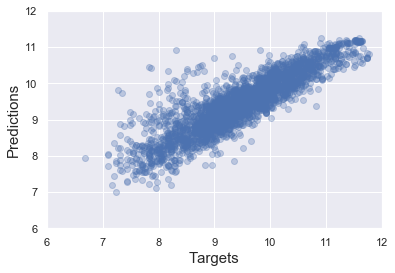

In [64]:
plt.scatter(y_train,y_pred,alpha=0.3)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.xlim(6,12)
plt.ylim(6,12)

Text(0.5, 1.0, 'Residual PDF')

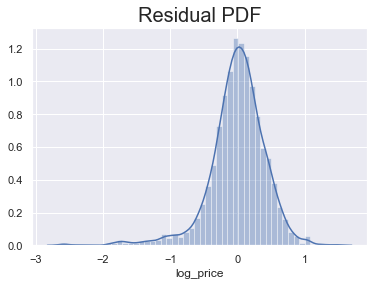

In [65]:
sns.distplot(y_train - y_pred)
plt.title('Residual PDF',size=20)

In [66]:
model.score(x_train,y_train)

0.7672315753085659

### Finding the weights and bias

In [67]:
model.intercept_

9.42187151585647

In [68]:
model.coef_

array([-0.4660599 ,  0.19791548, -0.01087442, -0.01025122, -0.07915665,
       -0.07440722,  0.01208275,  0.01028598, -0.06192657, -0.01092461,
        0.03037482,  0.00168983,  0.01949203, -0.15031094, -0.20069769,
       -0.07718263, -0.11361418, -0.1418334 , -0.07956253, -0.18159709,
       -0.11636071, -0.08690012, -0.12027463, -0.02673709, -0.15961369,
        0.31876772])

In [69]:
model_summary = DataFrame()
model_summary['Features'] = X.columns.values
model_summary['Weights'] = model.coef_

In [70]:
model_summary

,Features,Weights
0,Mileage,-0.466060
1,EngineV,0.197915
2,Model_E-Class,-0.010874
3,Model_A6,-0.010251
4,Model_Vito,-0.079157
5,Model_Kangoo,-0.074407
6,Model_Camry,0.012083
7,Model_X5,0.010286
8,Model_Caddy,-0.061927
9,Model_T5 (Transporter),-0.010925


In [71]:
model_summary.index = model_summary.index + 1
model_summary.loc[0] = ['Intercept',model.intercept_]

In [72]:
model_summary.sort_index()

,Features,Weights
0,Intercept,9.421872
1,Mileage,-0.466060
2,EngineV,0.197915
3,Model_E-Class,-0.010874
4,Model_A6,-0.010251
5,Model_Vito,-0.079157
6,Model_Kangoo,-0.074407
7,Model_Camry,0.012083
8,Model_X5,0.010286
9,Model_Caddy,-0.061927


# Testing

In [73]:
y_test_pred = model.predict(x_test)

(6, 12)

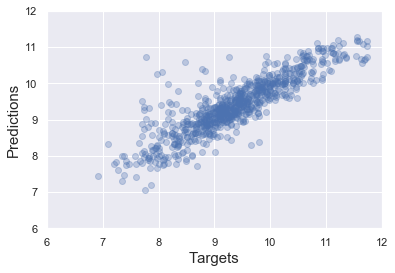

In [74]:
plt.scatter(y_test,y_test_pred,alpha=0.3)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.xlim(6,12)
plt.ylim(6,12)

In [75]:
model.score(x_test,y_test)

0.7571036292506567

In [76]:
df_perf = DataFrame()
df_perf['Prediction'] = np.exp(y_test_pred)
df_perf['Target'] = np.exp(y_test.reset_index(drop=True))
df_perf['Residual'] = df_perf['Target'] - df_perf['Prediction']
df_perf['% Difference'] = np.abs((df_perf['Residual']/df_perf['Target'])*100)

In [77]:
df_perf.head().round(2)

,Prediction,Target,Residual,% Difference
0,39649.38,21300.0,-18349.38,86.15
1,9659.67,8900.0,-759.67,8.54
2,5882.52,3250.0,-2632.52,81.00
3,9528.37,12000.0,2471.63,20.60
4,7394.94,5400.0,-1994.94,36.94


In [78]:
df_perf.describe()

,Prediction,Target,Residual,% Difference
count,774.000000,774.000000,774.000000,774.000000
mean,16252.508130,17799.988992,1547.480862,39.931087
std,13597.697877,19723.434542,10739.232000,95.669446
min,1161.923527,999.000000,-42760.626608,0.016070
25%,7386.765406,6700.000000,-2041.017565,9.692512
50%,11564.764762,11050.000000,-31.326126,22.504607
75%,20822.319673,20475.000000,2448.722982,38.820740
max,78363.574640,125000.000000,78823.807431,1781.692775


In [79]:
df_perf.sort_values(by='% Difference')

,Prediction,Target,Residual,% Difference
453,12198.039471,12200.00,1.960529,0.016070
534,7001.642631,6999.00,-2.642631,0.037757
263,16992.614078,17000.00,7.385922,0.043447
457,21856.631986,21900.00,43.368014,0.198027
190,13172.419020,13200.00,27.580980,0.208947
151,13432.694854,13400.00,-32.694854,0.243991
425,2992.024654,3000.00,7.975346,0.265845
69,14138.398196,14100.00,-38.398196,0.272328
520,5415.724735,5400.00,-15.724735,0.291199
563,8227.229801,8200.00,-27.229801,0.332071
